In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
Aquifer_Petrignano = pd.read_csv('./datasets/Aquifer_Petrignano.csv')

In [3]:
Aquifer_Petrignano

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [4]:
Aquifer_Petrignano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [5]:
Aquifer_Petrignano.shape

(5223, 8)

### Filled Entries

<AxesSubplot:>

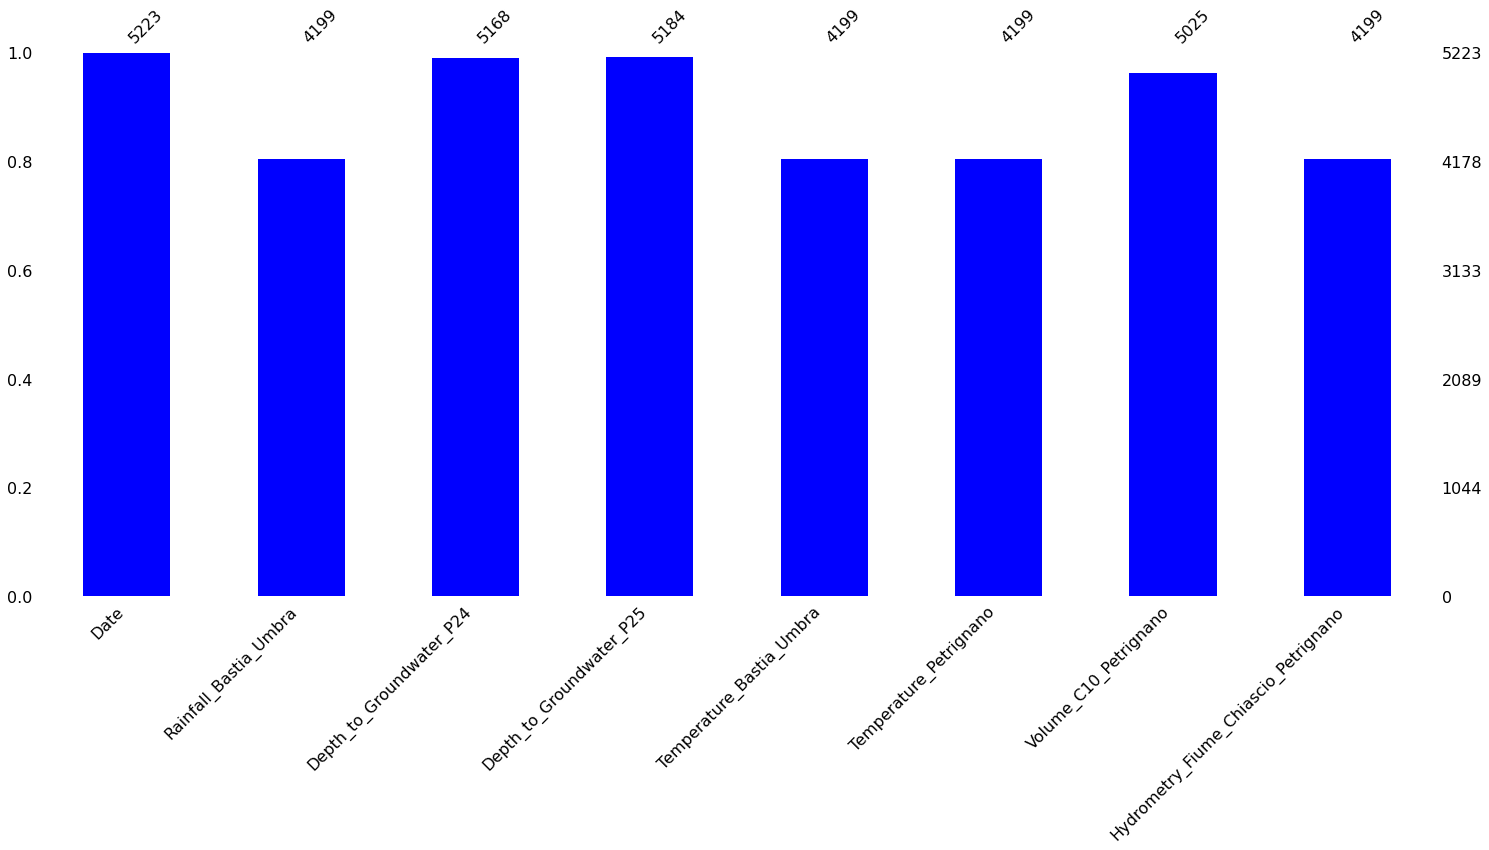

In [6]:
msno.bar(Aquifer_Petrignano,color='b')

### Dates starting and ending values

In [7]:
print('starting date:', Aquifer_Petrignano.Date.values[[0,-1]][0])
print('ending date:', Aquifer_Petrignano.Date.values[[0,-1]][1])


starting date: 14/03/2006
ending date: 30/06/2020


### Position of Null values

<AxesSubplot:>

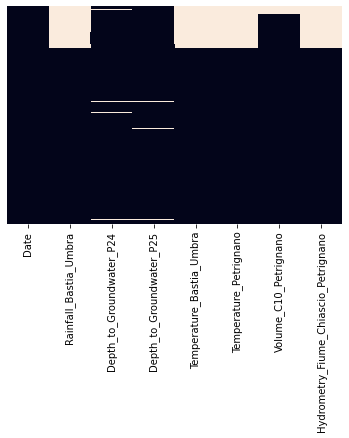

In [8]:
sns.heatmap(Aquifer_Petrignano.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:>

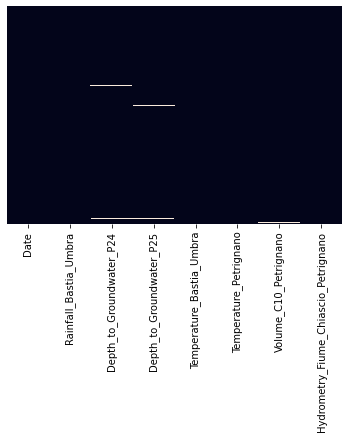

In [9]:
Aquifer_Petrignano.drop(Aquifer_Petrignano.index[0:1024], inplace=True)
sns.heatmap(Aquifer_Petrignano.isnull(),yticklabels=False,cbar=False)

In [10]:
data=Aquifer_Petrignano.copy()
data.drop('Date',axis=1,inplace=True)

### Feature Selection

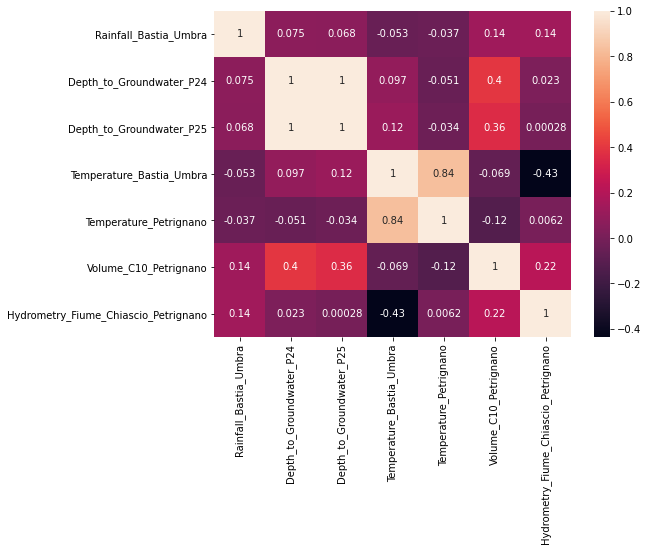

In [11]:
#sns.heatmap(data.corr())
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [12]:
features_nan=[features for features in Aquifer_Petrignano.columns if Aquifer_Petrignano[features].isnull().sum()>1 and Aquifer_Petrignano[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(Aquifer_Petrignano[feature].isnull().mean()*100,4),'% missing ')

Depth_to_Groundwater_P24 0.9288 % missing 
Depth_to_Groundwater_P25 0.643 % missing 


In [13]:
'''
Columns that are going to be dropped



'''

'\nColumns that are going to be dropped\n\n\n\n'

In [14]:
a = Aquifer_Petrignano

features_nan=[features for features in a.columns if a[features].isnull().sum()>1 and a[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(a[feature].isnull().mean()*100,4),'% missing ')

Depth_to_Groundwater_P24 0.9288 % missing 
Depth_to_Groundwater_P25 0.643 % missing 


### Imputation

In [15]:
def cal(x):
    null_values=x.isnull().sum()
    count_values=x.value_counts().unique
    mean=x.mean()
    median=x.median()
    mode=x.mode()
    print('null_values: ',null_values,'count_values: ', count_values, 'mean: ',mean,'median: ', median,'mode: ',mode, sep=' \n  ' )
    return

In [16]:
x=a['Depth_to_Groundwater_P24']
cal(x)

null_values:  
  39 
  count_values:  
  <bound method Series.unique of -23.71    14
-27.16    13
-23.47    13
-27.13    13
-23.44    13
          ..
-33.71     1
-30.23     1
-22.64     1
-33.46     1
-30.25     1
Name: Depth_to_Groundwater_P24, Length: 1145, dtype: int64> 
  mean:  
  -25.713706730769267 
  median:  
  -25.55 
  mode:  
  0   -23.71
dtype: float64


In [17]:
a['Depth_to_Groundwater_P24']=a['Depth_to_Groundwater_P24'].fillna(a['Depth_to_Groundwater_P24'].median())

Depth_to_Groundwater_P25

In [18]:
x=a['Depth_to_Groundwater_P25']
cal(x)

null_values:  
  27 
  count_values:  
  <bound method Series.unique of -26.45    17
-26.38    15
-28.61    15
-26.46    14
-23.38    14
          ..
-23.12     1
-19.68     1
-30.85     1
-31.26     1
-20.04     1
Name: Depth_to_Groundwater_P25, Length: 1142, dtype: int64> 
  mean:  
  -25.18253355704689 
  median:  
  -25.17 
  mode:  
  0   -26.45
dtype: float64


In [19]:
a['Depth_to_Groundwater_P25']=a['Depth_to_Groundwater_P25'].fillna(a['Depth_to_Groundwater_P25'].median())

Volume_C10_Petrignano

In [20]:
x=a['Volume_C10_Petrignano']
cal(x)

null_values:  
  1 
  count_values:  
  <bound method Series.unique of  0.000        25
-26127.360     4
-27076.032     4
-26257.824     3
-29742.336     3
              ..
-28571.616     1
-29485.728     1
-23775.552     1
-27097.632     1
-29217.888     1
Name: Volume_C10_Petrignano, Length: 3669, dtype: int64> 
  mean:  
  -28669.156619342506 
  median:  
  -28389.744 
  mode:  
  0    0.0
dtype: float64


In [21]:
a['Volume_C10_Petrignano']=a['Volume_C10_Petrignano'].fillna(a['Volume_C10_Petrignano'].median())

In [22]:
a.isnull().sum()

Date                                    0
Rainfall_Bastia_Umbra                   0
Depth_to_Groundwater_P24                0
Depth_to_Groundwater_P25                0
Temperature_Bastia_Umbra                0
Temperature_Petrignano                  0
Volume_C10_Petrignano                   0
Hydrometry_Fiume_Chiascio_Petrignano    0
dtype: int64

In [23]:
pd.DataFrame.to_csv(a,'./new_datasets/Aquifer_Petrignano.csv')